# Stationary distribution - Restricted geometric Brownian motion

In [1]:
# Libraries ----
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.ticker as mtick # type: ignore

from scipy.optimize import curve_fit # type: ignore

sys.path.append('../modules')
import misc_functions as mf # type: ignore
import eda_geometric_brownian_motion as edagbm # type: ignore
import estimate_geometric_brownian_motion as egbm # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-04-27"

## Geometric Brownian motion simulations

In [3]:
mu = 0 # Stochastic drift
sigma = 0.2 # Diffusion coefficient
x0 = 1 # Initial value
t0 = 0 # Initial time
tf = 10 # Last time
n_steps = 11 # Number of steps per simulation
n_samples = 20 # Number of simulations

In [4]:
# Geometric Brownian motion arguments list sampling ----
gbm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
gbm_args_list = gbm_args_list.values.tolist()


In [5]:
# Simulate multiple Geometric Brownian motion paths
df_gbm = egbm.simulate_geometric_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = 0,
    threshold_flag = False,
    gbm_args_list = gbm_args_list,
    log_path = log_path,
    log_filename = "log_gbm",
    verbose = 1,
    tqdm_bar = True
)
df_gbm

100%|███████████████████████| 20/20 [00:01<00:00, 10.48it/s]


,simulation,restricted,time,value
0,1,False,0.0,1.000000
1,1,False,1.0,0.949546
2,1,False,2.0,0.927529
3,1,False,3.0,0.684672
4,1,False,4.0,0.608798
...,...,...,...,...
6,20,False,6.0,0.520065
7,20,False,7.0,0.610396
8,20,False,8.0,0.574525
9,20,False,9.0,0.480133


## Geometric Brownian motion with threshold

In [6]:
mu = 1.05 * 10**-2 # Stochastic drift
sigma = 1 * 10**-1 # Diffusion coefficient
threshold = 5 * 10**-1 # Threshold value
x0 = 1 * 10**0 # Initial value
t0 = 0 * 10**0 # Initial time
tf = 1 * 10**2 # Last time
n_steps = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples = 4 * 10 ** 4 # Number of simulations

In [7]:
# Brownian motion arguments list sampling ----
rgbm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
rgbm_args_list = rgbm_args_list.values.tolist()


In [8]:
# Simulate multiple of restricted Geometric Brownian motion paths
df_rgbm = egbm.simulate_geometric_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    threshold_flag = True,
    gbm_args_list = rgbm_args_list,
    log_path = log_path,
    log_filename = "log_rgbm",
    verbose = 1,
    tqdm_bar = True
)
df_rgbm

100%|███████████████| 40000/40000 [00:34<00:00, 1168.57it/s]


,simulation,restricted,time,value
0,1,True,0.00,1.000000
1,1,True,0.02,0.983218
2,1,True,0.04,0.970861
3,1,True,0.06,0.975077
4,1,True,0.08,0.994016
...,...,...,...,...
4996,40000,True,99.92,1.051138
4997,40000,True,99.94,1.060111
4998,40000,True,99.96,1.063625
4999,40000,True,99.98,1.058694


# Exploratory Data Analysis

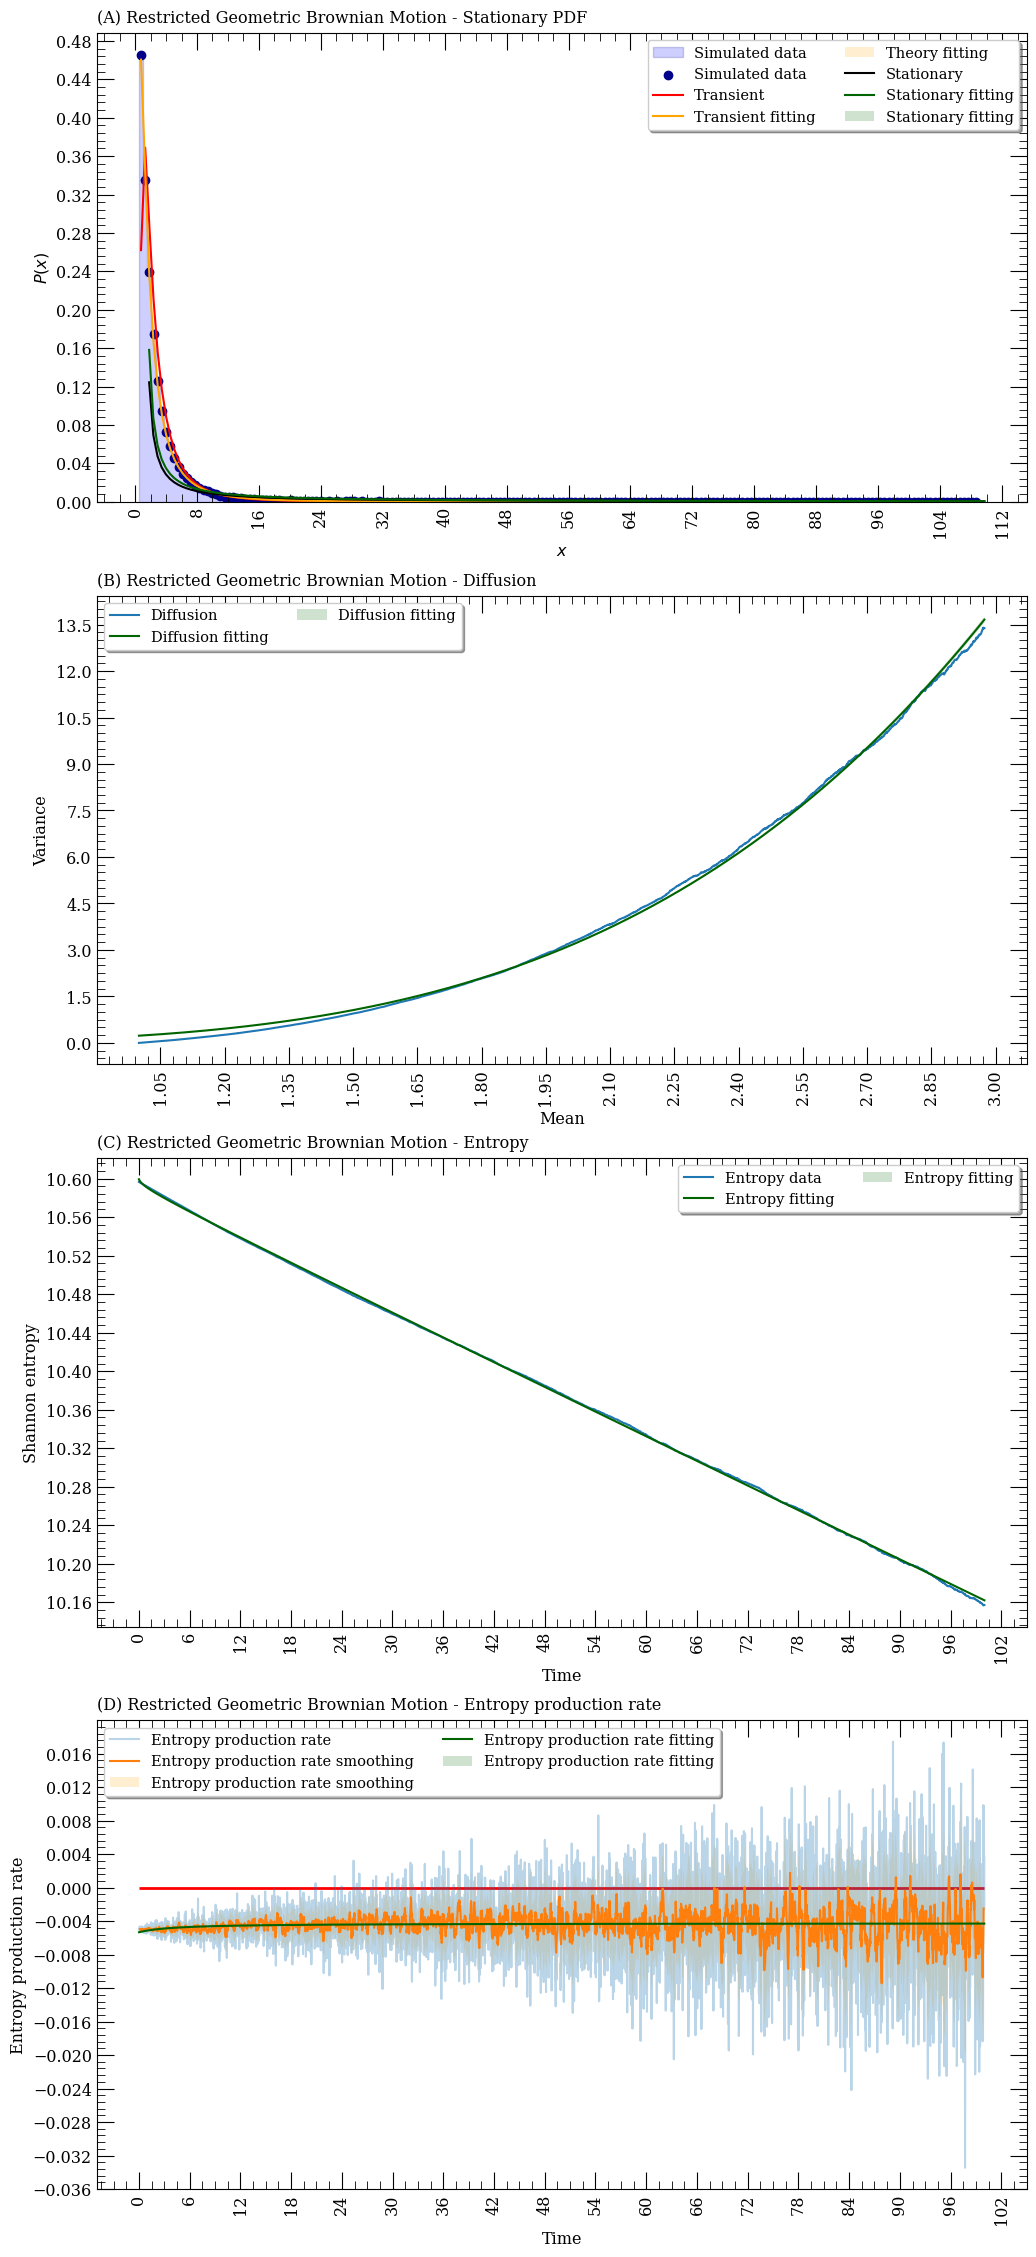

,fitting,params_name,params_value,params_lower,params_upper,r_squared,p_norm,mae_p
0,Transient state,time,110.717904,-4.325030e+07,4.325052e+07,99.936,1,0.000362
1,Transient state,mu,0.009527,-3.721741e+03,3.721760e+03,99.936,1,0.000362
2,Transient state,sigma,0.110327,-2.154881e+04,2.154903e+04,99.936,1,0.000362
3,Transient state,threshold,0.386580,3.113900e-01,4.617701e-01,99.936,1,0.000362
0,Stationary state,threshold,0.625000,-7.287217e+00,8.537217e+00,49.151,1,0.007272
1,Stationary state,lambda,0.125000,-9.044291e-02,3.404429e-01,49.151,1,0.007272
0,Diffusion law,coefficient,0.232818,2.320949e-01,2.335414e-01,99.833,1,0.126358
1,Diffusion law,exponent,3.736576,3.733352e+00,3.739801e+00,99.833,1,0.126358
0,Entropy,mu,0.018454,-5.121407e+00,5.158315e+00,99.985,1,0.001261
1,Entropy,sigma,0.016548,-5.829636e+00,5.862731e+00,99.985,1,0.001261


In [9]:
edagbm.plot_geometric_brownian_motion(
    df_gbm = df_rgbm,
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    n_steps = n_steps,
    bins = int(np.sqrt(n_samples))+1,
    density = True,
    alpha = 0.25,
    beta = -6,
    p = 1,
    ma_window = 10,
    p_norm = 1,
    significant_figures = 3,
    width = 12,
    height = 28,
    fontsize_labels = 11.5,
    fontsize_legend = 10.5,
    n_cols = 2,
    n_x_breaks = 20,
    n_y_breaks = 15,
    fancy_legend = True,
    usetex = False,
    dpi = 200,
    save_figures = False,
    output_path = output_path,
    information_name = "restricted_geometric_brownian_motion",
    input_generation_date = input_generation_date
)

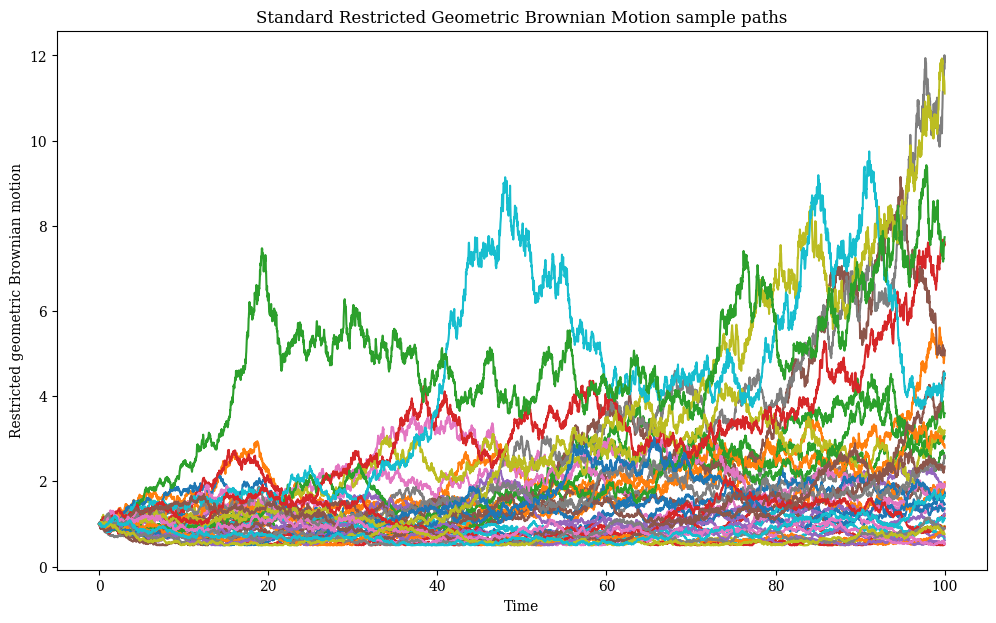

In [10]:
# Restricted Geometric Brownian motion samples ----
fig_2, ax_2 = plt.subplots(1, 1, figsize = (12, 7))

for path in range(0, 40):
    df_aux = df_rgbm[df_rgbm["simulation"] == path]
    ax_2.plot(
        df_aux["time"],
        df_aux["value"],
        alpha = 1,
        zorder = 2,
        marker = "",
        linestyle = "-",
        markersize = 1
    )
ax_2.set_title("Standard Restricted Geometric Brownian Motion sample paths")
ax_2.set_xlabel("Time")
ax_2.set_ylabel("Restricted geometric Brownian motion")
plt.show()